# PCA for 6 and 10 components

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [109]:
df_15_10inst = pd.read_csv('C:/PSL_KNN/data_15_frames_10_instances.csv')

df_15_10inst['classes'] = df_15_10inst['videoname'].apply(lambda x: x.split('_')[0])
x_10_10inst = df_15_10inst.groupby('videoname').agg({'coordinate':lambda x: list(x)})
print(pd.unique(df_15_10inst['videoname']))
temp_15_10inst = pd.DataFrame(x_10_10inst['coordinate'].tolist())

['aprender_175' 'aprender_18' 'aprender_195' 'aprender_217' 'aprender_27'
 'aprender_282' 'aprender_34' 'aprender_35' 'aprender_7' 'aprender__466'
 'bien_16' 'bien_241' 'bien_244' 'bien_278' 'bien_295' 'bien_329'
 'bien_39' 'bien_401' 'bien_561' 'bien_95' 'comer_144' 'comer_248'
 'comer_286' 'comer_303' 'comer_323' 'comer_335' 'comer_560' 'comer_625'
 'comer_712' 'comer_765' 'emoción_143' 'emoción_249' 'emoción_250'
 'emoción_272' 'emoción_281' 'emoción_286' 'emoción_43' 'emoción_54'
 'emoción_71' 'emoción_93' 'sentir_14' 'sentir_149' 'sentir_16'
 'sentir_187' 'sentir_38' 'sentir_458' 'sentir_591' 'sentir_602'
 'sentir_604' 'sentir_89' 'sí_157' 'sí_159' 'sí_194' 'sí_240' 'sí_253'
 'sí_281' 'sí_633' 'sí_76' 'sí_79' 'sí_83']


In [110]:
temp_15_10inst.insert(0,"instance",['aprender_175','aprender_18','aprender_195','aprender_217','aprender_27'
,'aprender_282','aprender_34','aprender_35','aprender_7','aprender__466'
,'bien_16','bien_241','bien_244','bien_278','bien_295','bien_329'
,'bien_39','bien_401','bien_561','bien_95','comer_144','comer_248'
,'comer_286','comer_303','comer_323','comer_335','comer_560','comer_625'
,'comer_712','comer_765','emoción_143','emoción_249','emoción_250'
,'emoción_272','emoción_281','emoción_286','emoción_43','emoción_54'
,'emoción_71','emoción_93','sentir_14','sentir_149','sentir_16'
,'sentir_187','sentir_38','sentir_458','sentir_591','sentir_602'
,'sentir_604','sentir_89','sí_157','sí_159','sí_194','sí_240','sí_253'
,'sí_281','sí_633','sí_76','sí_79','sí_83'],True)


temp_15_10inst['classes'] = temp_15_10inst['instance'].apply(lambda x: x.split('_')[0])

In [111]:
temp_15_10inst_w1 = temp_15_10inst[~temp_15_10inst.classes.str.startswith('bien')]
temp_15_10inst_w2 = temp_15_10inst_w1[~temp_15_10inst_w1.classes.str.startswith('emoción')]
temp_15_10inst_w3 = temp_15_10inst_w2[~temp_15_10inst_w2.classes.str.startswith('sí')]

In [112]:
temp_15_10inst_w3.instance.unique()

array(['aprender_175', 'aprender_18', 'aprender_195', 'aprender_217',
       'aprender_27', 'aprender_282', 'aprender_34', 'aprender_35',
       'aprender_7', 'aprender__466', 'comer_144', 'comer_248',
       'comer_286', 'comer_303', 'comer_323', 'comer_335', 'comer_560',
       'comer_625', 'comer_712', 'comer_765', 'sentir_14', 'sentir_149',
       'sentir_16', 'sentir_187', 'sentir_38', 'sentir_458', 'sentir_591',
       'sentir_602', 'sentir_604', 'sentir_89'], dtype=object)

In [113]:
verbs_dataset_15_10inst = temp_15_10inst_w3.iloc[:,1:692]  #461 columnas
new_verbs_dataset_15_10inst = temp_15_10inst_w3.iloc[:,1:691]  #460 columnas
new_verbs_dataset_15_10inst.head()

,0,1,2,3,4,5,6,7,8,9,...,680,681,682,683,684,685,686,687,688,689
0,0.495806,0.523832,0.543781,0.561008,0.480482,0.470032,0.456728,0.594658,0.453686,0.529510,...,0.500838,0.711247,0.265011,0.616345,0.206288,0.619600,0.193010,0.575766,0.216091,0.569957
1,0.514355,0.548313,0.566283,0.582197,0.492174,0.473143,0.458056,0.605790,0.432162,0.548547,...,0.835927,0.593772,0.717398,0.273364,0.725694,0.203702,0.691389,0.187576,0.682246,0.215089
2,0.497058,0.520504,0.534275,0.545982,0.475575,0.459812,0.444983,0.569902,0.425907,0.531288,...,0.545798,0.660586,0.365322,0.592418,0.316429,0.612745,0.295847,0.586953,0.318972,0.577937
3,0.534864,0.561178,0.575552,0.589922,0.518197,0.505109,0.491974,0.622407,0.479705,0.565821,...,0.688550,0.651008,0.534688,0.491965,0.493898,0.453951,0.451767,0.424164,0.463112,0.435933
4,0.503365,0.525808,0.540525,0.552654,0.479290,0.461092,0.443024,0.578166,0.415693,0.533283,...,0.837421,0.595184,0.661107,0.276439,0.618137,0.213217,0.572178,0.194524,0.589513,0.223879


In [114]:
verbs_dataset_15_10inst = verbs_dataset_15_10inst.T.iloc[:690,:]
verbs_dataset_15_10inst.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.495806,0.514355,0.497058,0.534864,0.503365,0.509485,0.507398,0.469856,0.516629,0.496019,...,0.483538,0.476497,0.467994,0.460103,0.491592,0.491608,0.424188,0.491743,0.500296,0.510462
1,0.523832,0.548313,0.520504,0.561178,0.525808,0.528646,0.533684,0.49226,0.533556,0.525887,...,0.516675,0.510761,0.486192,0.486414,0.501808,0.519611,0.465866,0.520249,0.530113,0.519526
2,0.543781,0.566283,0.534275,0.575552,0.540525,0.544299,0.546516,0.508573,0.54548,0.539174,...,0.53488,0.52998,0.495588,0.502186,0.513359,0.537585,0.487069,0.537505,0.544617,0.53007
3,0.561008,0.582197,0.545982,0.589922,0.552654,0.560631,0.563036,0.525647,0.558149,0.555429,...,0.553051,0.547699,0.508684,0.516908,0.526012,0.551587,0.507556,0.552414,0.562521,0.539912
4,0.480482,0.492174,0.475575,0.518197,0.47929,0.484755,0.481147,0.448011,0.498532,0.469796,...,0.458286,0.456721,0.440813,0.442111,0.462897,0.465834,0.413195,0.473218,0.47111,0.478172


In [115]:
verbs_dataset_15_10inst.columns = ['aprender_175', 'aprender_18', 'aprender_195', 'aprender_217',
       'aprender_27', 'aprender_282', 'aprender_34', 'aprender_35',
       'aprender_7', 'aprender__466', 'comer_144', 'comer_248',
       'comer_286', 'comer_303', 'comer_323', 'comer_335', 'comer_560',
       'comer_625', 'comer_712', 'comer_765', 'sentir_14', 'sentir_149',
       'sentir_16', 'sentir_187', 'sentir_38', 'sentir_458', 'sentir_591',
       'sentir_602', 'sentir_604', 'sentir_89']

In [116]:
verbs_dataset_15_10inst_features = ['feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9','feature_10','feature_11','feature_12','feature_13','feature_14','feature_15','feature_16','feature_17','feature_18','feature_19','feature_20','feature_21','feature_22','feature_23','feature_24','feature_25','feature_26','feature_27','feature_28','feature_29','feature_30','feature_31','feature_32','feature_33','feature_34','feature_35','feature_36','feature_37','feature_38','feature_39','feature_40','feature_41','feature_42','feature_43','feature_44','feature_45','feature_46','feature_47','feature_48','feature_49','feature_50','feature_51','feature_52','feature_53','feature_54','feature_55','feature_56','feature_57','feature_58','feature_59','feature_60','feature_61','feature_62','feature_63','feature_64','feature_65','feature_66','feature_67','feature_68','feature_69','feature_70','feature_71','feature_72','feature_73','feature_74','feature_75','feature_76','feature_77','feature_78','feature_79','feature_80','feature_81','feature_82','feature_83','feature_84','feature_85','feature_86','feature_87','feature_88','feature_89','feature_90','feature_91','feature_92','feature_93','feature_94','feature_95','feature_96','feature_97','feature_98','feature_99','feature_100','feature_101','feature_102','feature_103','feature_104','feature_105','feature_106','feature_107','feature_108','feature_109','feature_110','feature_111','feature_112','feature_113','feature_114','feature_115','feature_116','feature_117','feature_118','feature_119','feature_120','feature_121','feature_122','feature_123','feature_124','feature_125','feature_126','feature_127','feature_128','feature_129','feature_130','feature_131','feature_132','feature_133','feature_134','feature_135','feature_136','feature_137','feature_138','feature_139','feature_140','feature_141','feature_142','feature_143','feature_144','feature_145','feature_146','feature_147','feature_148','feature_149','feature_150','feature_151','feature_152','feature_153','feature_154','feature_155','feature_156','feature_157','feature_158','feature_159','feature_160','feature_161','feature_162','feature_163','feature_164','feature_165','feature_166','feature_167','feature_168','feature_169','feature_170','feature_171','feature_172','feature_173','feature_174','feature_175','feature_176','feature_177','feature_178','feature_179','feature_180','feature_181','feature_182','feature_183','feature_184','feature_185','feature_186','feature_187','feature_188','feature_189','feature_190','feature_191','feature_192','feature_193','feature_194','feature_195','feature_196','feature_197','feature_198','feature_199','feature_200','feature_201','feature_202','feature_203','feature_204','feature_205','feature_206','feature_207','feature_208','feature_209','feature_210','feature_211','feature_212','feature_213','feature_214','feature_215','feature_216','feature_217','feature_218','feature_219','feature_220','feature_221','feature_222','feature_223','feature_224','feature_225','feature_226','feature_227','feature_228','feature_229','feature_230','feature_231','feature_232','feature_233','feature_234','feature_235','feature_236','feature_237','feature_238','feature_239','feature_240','feature_241','feature_242','feature_243','feature_244','feature_245','feature_246','feature_247','feature_248','feature_249','feature_250','feature_251','feature_252','feature_253','feature_254','feature_255','feature_256','feature_257','feature_258','feature_259','feature_260','feature_261','feature_262','feature_263','feature_264','feature_265','feature_266','feature_267','feature_268','feature_269','feature_270','feature_271','feature_272','feature_273','feature_274','feature_275','feature_276','feature_277','feature_278','feature_279','feature_280','feature_281','feature_282','feature_283','feature_284','feature_285','feature_286','feature_287','feature_288','feature_289','feature_290','feature_291','feature_292','feature_293','feature_294','feature_295','feature_296','feature_297','feature_298','feature_299','feature_300','feature_301','feature_302','feature_303','feature_304','feature_305','feature_306','feature_307','feature_308','feature_309','feature_310','feature_311','feature_312','feature_313','feature_314','feature_315','feature_316','feature_317','feature_318','feature_319','feature_320','feature_321','feature_322','feature_323','feature_324','feature_325','feature_326','feature_327','feature_328','feature_329','feature_330','feature_331','feature_332','feature_333','feature_334','feature_335','feature_336','feature_337','feature_338','feature_339','feature_340','feature_341','feature_342','feature_343','feature_344','feature_345','feature_346','feature_347','feature_348','feature_349','feature_350','feature_351','feature_352','feature_353','feature_354','feature_355','feature_356','feature_357','feature_358','feature_359','feature_360','feature_361','feature_362','feature_363','feature_364','feature_365','feature_366','feature_367','feature_368','feature_369','feature_370','feature_371','feature_372','feature_373','feature_374','feature_375','feature_376','feature_377','feature_378','feature_379','feature_380','feature_381','feature_382','feature_383','feature_384','feature_385','feature_386','feature_387','feature_388','feature_389','feature_390','feature_391','feature_392','feature_393','feature_394','feature_395','feature_396','feature_397','feature_398','feature_399','feature_400','feature_401','feature_402','feature_403','feature_404','feature_405','feature_406','feature_407','feature_408','feature_409','feature_410','feature_411','feature_412','feature_413','feature_414','feature_415','feature_416','feature_417','feature_418','feature_419','feature_420','feature_421','feature_422','feature_423','feature_424','feature_425','feature_426','feature_427','feature_428','feature_429','feature_430','feature_431','feature_432','feature_433','feature_434','feature_435','feature_436','feature_437','feature_438','feature_439','feature_440','feature_441','feature_442','feature_443','feature_444','feature_445','feature_446','feature_447','feature_448','feature_449','feature_450','feature_451','feature_452','feature_453','feature_454','feature_455','feature_456','feature_457','feature_458', 'feature_459', 'feature_460','feature_461','feature_462','feature_463','feature_464','feature_465','feature_466','feature_467','feature_468','feature_469','feature_470','feature_471','feature_472','feature_473','feature_474','feature_475','feature_476','feature_477','feature_478','feature_479','feature_480','feature_481','feature_482','feature_483','feature_484','feature_485','feature_486','feature_487','feature_488','feature_489','feature_490','feature_491','feature_492','feature_493','feature_494','feature_495','feature_496','feature_497','feature_498','feature_499','feature_500','feature_501','feature_502','feature_503','feature_504','feature_505','feature_506','feature_507','feature_508','feature_509','feature_510','feature_511','feature_512','feature_513','feature_514','feature_515','feature_516','feature_517','feature_518','feature_519','feature_520','feature_521','feature_522','feature_523','feature_524','feature_525','feature_526','feature_527','feature_528','feature_529','feature_530','feature_531','feature_532','feature_533','feature_534','feature_535','feature_536','feature_537','feature_538','feature_539','feature_540','feature_541','feature_542','feature_543','feature_544','feature_545','feature_546','feature_547','feature_548','feature_549','feature_550','feature_551','feature_552','feature_553','feature_554','feature_555','feature_556','feature_557','feature_558','feature_559','feature_560','feature_561','feature_562','feature_563','feature_564','feature_565','feature_566','feature_567','feature_568','feature_569','feature_570','feature_571','feature_572','feature_573','feature_574','feature_575','feature_576','feature_577','feature_578','feature_579','feature_580','feature_581','feature_582','feature_583','feature_584','feature_585','feature_586','feature_587','feature_588','feature_589','feature_590','feature_591','feature_592','feature_593','feature_594','feature_595','feature_596','feature_597','feature_598','feature_599','feature_600','feature_601','feature_602','feature_603','feature_604','feature_605','feature_606','feature_607','feature_608','feature_609','feature_610','feature_611','feature_612','feature_613','feature_614','feature_615','feature_616','feature_617','feature_618','feature_619','feature_620','feature_621','feature_622','feature_623','feature_624','feature_625','feature_626','feature_627','feature_628','feature_629','feature_630','feature_631','feature_632','feature_633','feature_634','feature_635','feature_636','feature_637','feature_638','feature_639','feature_640','feature_641','feature_642','feature_643','feature_644','feature_645','feature_646','feature_647','feature_648','feature_649','feature_650','feature_651','feature_652','feature_653','feature_654','feature_655','feature_656','feature_657','feature_658','feature_659','feature_660','feature_661','feature_662','feature_663','feature_664','feature_665','feature_666','feature_667','feature_668','feature_669','feature_670','feature_671','feature_672','feature_673','feature_674','feature_675','feature_676','feature_677','feature_678','feature_679','feature_680','feature_681','feature_682','feature_683','feature_684','feature_685','feature_686','feature_687','feature_688','feature_689']

In [117]:
verbs_dataset_15_10inst['features'] = verbs_dataset_15_10inst_features

verbs_dataset_15_10inst.set_index('features',inplace = True)

In [118]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA

# sklearn center and scale the data, so that the means for each gene (instance) are 0 and the standard deviations for each gene are 1
scaled_data_verbs = preprocessing.scale(verbs_dataset_15_10inst.T)

In [119]:
pca_verbs = PCA()
pca_verbs.fit(scaled_data_verbs)
pca_data_verbs = pca_verbs.transform(scaled_data_verbs)

In [120]:
per_var_verbs = np.round(pca_verbs.explained_variance_ratio_* 100 , decimals = 1)
labels_verbs = ['PC' + str(x) for x in range(1 , len(per_var_verbs) +1)]

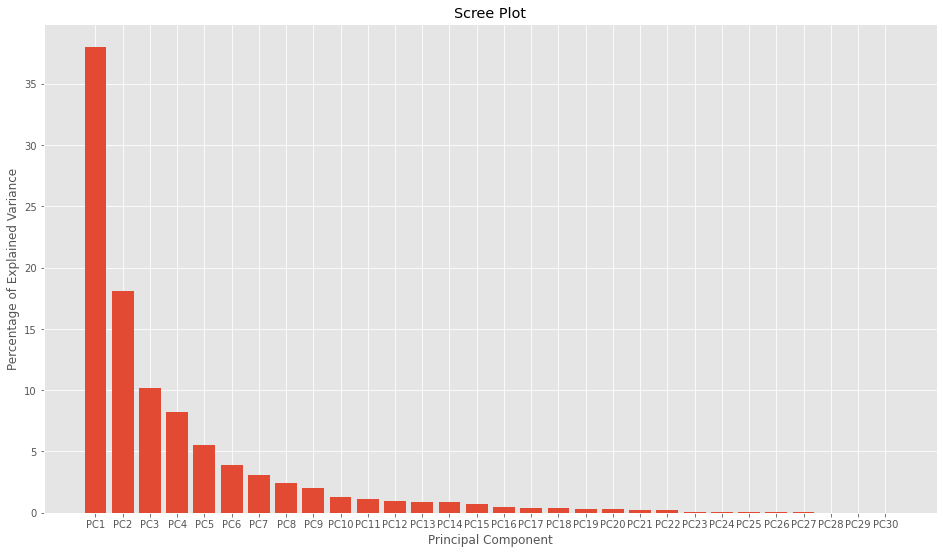

In [121]:
plt.bar(x=range(1, len(per_var_verbs) + 1 ), height = per_var_verbs, tick_label = labels_verbs)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [122]:
#Ojo, se cambió de posición (transposición), por eso pareciera que ambos (index y columns) llevaran lo mismo pero NO. El index lleva las instancias.
pca_df_verbs_verbs = pd.DataFrame(pca_data_verbs, index = verbs_dataset_15_10inst.columns , columns = labels_verbs)

In [123]:
# Loading scores for PC1

loading_scores_verbs  = pd.Series(pca_verbs.components_[0], index = verbs_dataset_15_10inst_features)
sorted_loading_scores_verbs = loading_scores_verbs.abs().sort_values(ascending = False)

top_10_instances_verbs = sorted_loading_scores_verbs[0:10].index.values
PC1_loading_scores_verbs = loading_scores_verbs[top_10_instances_verbs]

PC1_df_verbs = PC1_loading_scores_verbs.to_frame()
PC1_df_verbs = PC1_df_verbs.rename(columns={0: 'Col_1'})
PC1_df_verbs.reset_index(level=0, inplace=True)

####################

# Loading scores for PC2

loading_scores_verbs  = pd.Series(pca_verbs.components_[1], index = verbs_dataset_15_10inst_features)
sorted_loading_scores_verbs = loading_scores_verbs.abs().sort_values(ascending = False)
top_10_instances_verbs = sorted_loading_scores_verbs[0:10].index.values

PC2_loading_scores_verbs = loading_scores_verbs[top_10_instances_verbs]

PC2_df_verbs = PC2_loading_scores_verbs.to_frame()
PC2_df_verbs = PC2_df_verbs.rename(columns={0: 'Col_1'})
PC2_df_verbs.reset_index(level=0, inplace=True)

##########################

# Loading scores for PC3

loading_scores_verbs  = pd.Series(pca_verbs.components_[2], index = verbs_dataset_15_10inst_features)
sorted_loading_scores_verbs = loading_scores_verbs.abs().sort_values(ascending = False)

top_10_instances_verbs = sorted_loading_scores_verbs[0:10].index.values

PC3_loading_scores_verbs = loading_scores_verbs[top_10_instances_verbs]

PC3_df_verbs = PC3_loading_scores_verbs.to_frame()
PC3_df_verbs = PC3_df_verbs.rename(columns={0: 'Col_1'})

PC3_df_verbs.reset_index(level=0, inplace=True)

###########################

# Loading scores for PC4

loading_scores_verbs  = pd.Series(pca_verbs.components_[3], index = verbs_dataset_15_10inst_features)
sorted_loading_scores_verbs = loading_scores_verbs.abs().sort_values(ascending = False)

top_10_instances_verbs = sorted_loading_scores_verbs[0:10].index.values

PC4_loading_scores_verbs = loading_scores_verbs[top_10_instances_verbs]

PC4_df_verbs = PC4_loading_scores_verbs.to_frame()
PC4_df_verbs = PC4_df_verbs.rename(columns={0: 'Col_1'})
PC4_df_verbs.reset_index(level=0, inplace=True)

##################

# Loading scores for PC5

loading_scores_verbs  = pd.Series(pca_verbs.components_[4], index = verbs_dataset_15_10inst_features)
sorted_loading_scores_verbs = loading_scores_verbs.abs().sort_values(ascending = False)
top_10_instances_verbs = sorted_loading_scores_verbs[0:10].index.values
PC5_loading_scores_verbs = loading_scores_verbs[top_10_instances_verbs]

PC5_df_verbs = PC5_loading_scores_verbs.to_frame()
PC5_df_verbs = PC5_df_verbs.rename(columns={0: 'Col_1'})
PC5_df_verbs.reset_index(level=0, inplace=True)


######################

# Loading scores for PC6

loading_scores_verbs  = pd.Series(pca_verbs.components_[5], index = verbs_dataset_15_10inst_features)
sorted_loading_scores_verbs = loading_scores_verbs.abs().sort_values(ascending = False)

top_10_instances_verbs = sorted_loading_scores_verbs[0:10].index.values

PC6_loading_scores_verbs = loading_scores_verbs[top_10_instances_verbs]

PC6_df_verbs = PC6_loading_scores_verbs.to_frame()
PC6_df_verbs = PC6_df_verbs.rename(columns={0: 'Col_1'})
PC6_df_verbs.reset_index(level=0, inplace=True)

#########################

# Loading scores for PC7


loading_scores_verbs  = pd.Series(pca_verbs.components_[6], index = verbs_dataset_15_10inst_features)
sorted_loading_scores_verbs = loading_scores_verbs.abs().sort_values(ascending = False)
top_10_instances_verbs = sorted_loading_scores_verbs[0:10].index.values
PC7_loading_scores_verbs = loading_scores_verbs[top_10_instances_verbs]
PC7_df_verbs = PC7_loading_scores_verbs.to_frame()
PC7_df_verbs = PC7_df_verbs.rename(columns={0: 'Col_1'})
PC7_df_verbs.reset_index(level=0, inplace=True)

#################

# Loading scores for PC8

loading_scores_verbs  = pd.Series(pca_verbs.components_[7], index = verbs_dataset_15_10inst_features)
sorted_loading_scores_verbs = loading_scores_verbs.abs().sort_values(ascending = False)
top_10_instances_verbs = sorted_loading_scores_verbs[0:10].index.values

PC8_loading_scores_verbs = loading_scores_verbs[top_10_instances_verbs]

PC8_df_verbs = PC8_loading_scores_verbs.to_frame()
PC8_df_verbs = PC8_df_verbs.rename(columns={0: 'Col_1'})
PC8_df_verbs.reset_index(level=0, inplace=True)

####################

# Loading scores for PC9

loading_scores_verbs  = pd.Series(pca_verbs.components_[8], index = verbs_dataset_15_10inst_features)
sorted_loading_scores_verbs = loading_scores_verbs.abs().sort_values(ascending = False)
top_10_instances_verbs = sorted_loading_scores_verbs[0:10].index.values
PC9_loading_scores_verbs = loading_scores_verbs[top_10_instances_verbs]

PC9_df_verbs = PC9_loading_scores_verbs.to_frame()
PC9_df_verbs = PC9_df_verbs.rename(columns={0: 'Col_1'})
PC9_df_verbs.reset_index(level=0, inplace=True)

#####################

# Loading scores for PC10

loading_scores_verbs  = pd.Series(pca_verbs.components_[9], index = verbs_dataset_15_10inst_features)
sorted_loading_scores_verbs = loading_scores_verbs.abs().sort_values(ascending = False)
top_10_instances_verbs = sorted_loading_scores_verbs[0:10].index.values

PC10_loading_scores_verbs = loading_scores_verbs[top_10_instances_verbs]

PC10_df_verbs = PC10_loading_scores_verbs.to_frame()
PC10_df_verbs = PC10_df_verbs.rename(columns={0: 'Col_1'})
PC10_df_verbs.reset_index(level=0, inplace=True)

In [124]:
#calcular qué feature se repite más

PCA_10components_verbs = PC1_df_verbs.append(PC2_df_verbs).append(PC3_df_verbs).append(PC4_df_verbs).append(PC5_df_verbs).append(PC6_df_verbs).append(PC7_df_verbs).append(PC8_df_verbs).append(PC9_df_verbs).append(PC10_df_verbs)

dic = {}
for i in range(100):
    x = list(PCA_10components_verbs.iloc[i,:])
    if x[0] not in dic:
        dic[x[0]] = 1
    else:
        dic[x[0]] +=1

dic

{'feature_514': 1,
 'feature_491': 1,
 'feature_537': 1,
 'feature_493': 1,
 'feature_445': 1,
 'feature_468': 1,
 'feature_560': 1,
 'feature_609': 1,
 'feature_516': 1,
 'feature_632': 1,
 'feature_118': 1,
 'feature_141': 1,
 'feature_95': 1,
 'feature_164': 1,
 'feature_72': 1,
 'feature_117': 1,
 'feature_94': 1,
 'feature_30': 1,
 'feature_140': 1,
 'feature_71': 1,
 'feature_229': 1,
 'feature_227': 1,
 'feature_225': 1,
 'feature_202': 1,
 'feature_206': 1,
 'feature_204': 1,
 'feature_252': 1,
 'feature_250': 1,
 'feature_179': 1,
 'feature_248': 1,
 'feature_566': 1,
 'feature_589': 1,
 'feature_543': 1,
 'feature_612': 1,
 'feature_520': 1,
 'feature_635': 1,
 'feature_568': 1,
 'feature_591': 1,
 'feature_497': 1,
 'feature_637': 1,
 'feature_113': 1,
 'feature_111': 1,
 'feature_134': 1,
 'feature_136': 1,
 'feature_107': 1,
 'feature_132': 1,
 'feature_90': 1,
 'feature_84': 1,
 'feature_109': 1,
 'feature_130': 1,
 'feature_313': 2,
 'feature_336': 1,
 'feature_290': 3,


In [125]:
projection_verbs = pca_verbs.transform(X=new_verbs_dataset_15_10inst)
projection_verbs = pd.DataFrame(
    projection_verbs,
    columns =[ 'PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30'
    
    
    ],
    index   = new_verbs_dataset_15_10inst.index
)
projection_verbs.head()


##################

PC10_15_10inst_verbs = projection_verbs.iloc[:,0:10]
PC10_15_10inst_verbs.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-1.230948,-6.863344,-7.120026,-6.015051,-1.347710,-2.313597,-0.460766,0.483156,-1.418449,-1.275804
1,-3.473899,-7.012193,-6.595022,-6.275055,-2.180829,-1.720133,-1.475722,0.803843,-0.978464,-1.696043
2,-0.624820,-6.821121,-6.737548,-5.763252,-1.292660,-2.276969,-0.463819,0.167448,-1.512926,-1.081916
3,-1.560692,-7.535235,-5.994129,-4.734533,-1.031778,-2.387975,-0.708134,0.482082,-1.540635,-1.441769
4,-3.576838,-7.199196,-6.581287,-5.791579,-1.867002,-1.806051,-1.522375,0.850877,-0.981328,-1.583279


In [126]:

PC10_15_10inst_verbs.insert(0,"instance",['aprender_175', 'aprender_18', 'aprender_195', 'aprender_217',
       'aprender_27', 'aprender_282', 'aprender_34', 'aprender_35',
       'aprender_7', 'aprender__466', 'comer_144', 'comer_248',
       'comer_286', 'comer_303', 'comer_323', 'comer_335', 'comer_560',
       'comer_625', 'comer_712', 'comer_765', 'sentir_14', 'sentir_149',
       'sentir_16', 'sentir_187', 'sentir_38', 'sentir_458', 'sentir_591',
       'sentir_602', 'sentir_604', 'sentir_89'],True)
	   
	   ##################
	   
PC10_15_10inst_verbs['classes'] = PC10_15_10inst_verbs['instance'].apply(lambda x: x.split('_')[0])

C:\Users\BRENDA\anaconda3\envs\pose\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [127]:
PC10_15_10inst_verbs.drop("instance", axis=1, inplace=True)

PC10_15_10inst_verbs.head()

C:\Users\BRENDA\anaconda3\envs\pose\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,classes
0,-1.230948,-6.863344,-7.120026,-6.015051,-1.347710,-2.313597,-0.460766,0.483156,-1.418449,-1.275804,aprender
1,-3.473899,-7.012193,-6.595022,-6.275055,-2.180829,-1.720133,-1.475722,0.803843,-0.978464,-1.696043,aprender
2,-0.624820,-6.821121,-6.737548,-5.763252,-1.292660,-2.276969,-0.463819,0.167448,-1.512926,-1.081916,aprender
3,-1.560692,-7.535235,-5.994129,-4.734533,-1.031778,-2.387975,-0.708134,0.482082,-1.540635,-1.441769,aprender
4,-3.576838,-7.199196,-6.581287,-5.791579,-1.867002,-1.806051,-1.522375,0.850877,-0.981328,-1.583279,aprender


In [128]:
print(pd.unique(PC10_15_10inst_verbs['classes']))

X_PC10_15_10inst_verbs= PC10_15_10inst_verbs.iloc[:,:-1].values
y_PC10_15_10inst_verbs=  PC10_15_10inst_verbs.iloc[:,-1].values

['aprender' 'comer' 'sentir']


In [129]:
Labelencoder_Y = LabelEncoder()
y_PC10_15_10inst_verbs== Labelencoder_Y.fit_transform(y_PC10_15_10inst_verbs)
y_PC10_15_10inst_verbs

array(['aprender', 'aprender', 'aprender', 'aprender', 'aprender',
       'aprender', 'aprender', 'aprender', 'aprender', 'aprender',
       'comer', 'comer', 'comer', 'comer', 'comer', 'comer', 'comer',
       'comer', 'comer', 'comer', 'sentir', 'sentir', 'sentir', 'sentir',
       'sentir', 'sentir', 'sentir', 'sentir', 'sentir', 'sentir'],
      dtype=object)

In [130]:
X_train_PC10_15_10inst_verbs, X_test_PC10_15_10inst_verbs, y_train_PC10_15_10inst_verbs, y_test_PC10_15_10inst_verbs = train_test_split(X_PC10_15_10inst_verbs, y_PC10_15_10inst_verbs, test_size = 0.25, random_state=0)
scaler = MinMaxScaler()
X_train_PC10_15_10inst_verbs = scaler.fit_transform(X_train_PC10_15_10inst_verbs)
X_test_PC10_15_10inst_verbs = scaler.transform(X_test_PC10_15_10inst_verbs)

([<matplotlib.axis.XTick at 0x1c44e7c6408>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

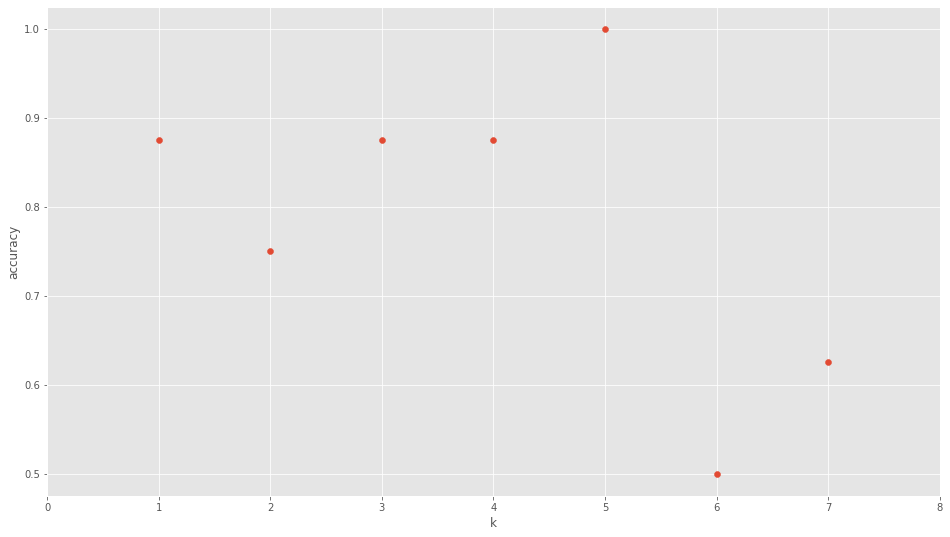

In [131]:
k_range_PC10_15_10inst_verbs = range(1, 8)
scores_PC10_15_10inst_verbs = []
for k in k_range_PC10_15_10inst_verbs:
    knn_PC10_15_10inst_verbs = KNeighborsClassifier(n_neighbors = k)
    knn_PC10_15_10inst_verbs.fit(X_train_PC10_15_10inst_verbs, y_train_PC10_15_10inst_verbs)
    scores_PC10_15_10inst_verbs.append(knn_PC10_15_10inst_verbs.score(X_test_PC10_15_10inst_verbs, y_test_PC10_15_10inst_verbs))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range_PC10_15_10inst_verbs, scores_PC10_15_10inst_verbs)
plt.xticks([0,1,2,3,4,5,6,7,8])

# With k = 1

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.88
[[1 0 0]
 [0 2 1]
 [0 0 4]]


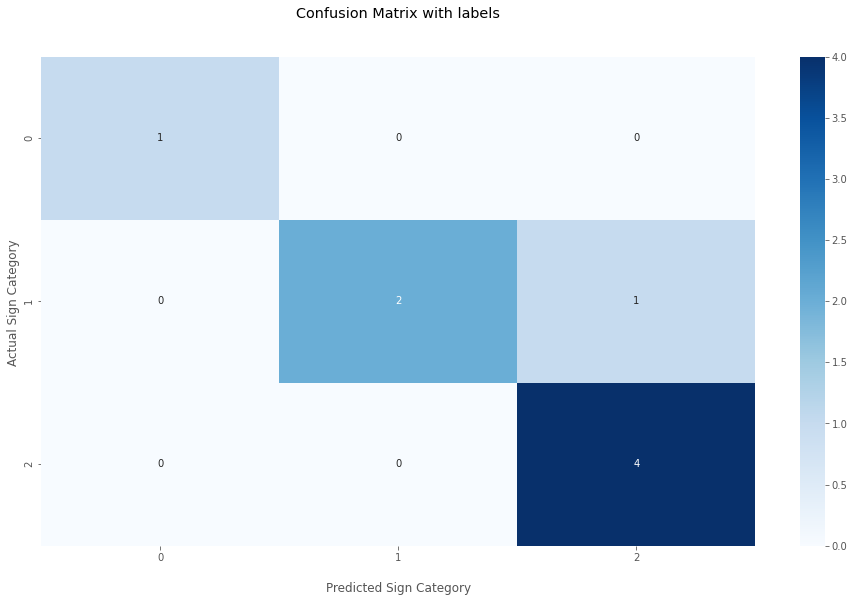

In [132]:
n_neighbors_PC10_15_10inst_verbs = 1
 
knn_PC10_15_10inst_verbs = KNeighborsClassifier(n_neighbors_PC10_15_10inst_verbs)
knn_PC10_15_10inst_verbs.fit(X_train_PC10_15_10inst_verbs, y_train_PC10_15_10inst_verbs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC10_15_10inst_verbs.score(X_train_PC10_15_10inst_verbs, y_train_PC10_15_10inst_verbs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC10_15_10inst_verbs.score(X_test_PC10_15_10inst_verbs, y_test_PC10_15_10inst_verbs)))
	 
import pandas as pd

pred_PC10_15_10inst_verbs = knn_PC10_15_10inst_verbs.predict(X_test_PC10_15_10inst_verbs)
cf_matrix_PC10_15_10inst_verbs = confusion_matrix(y_test_PC10_15_10inst_verbs, pred_PC10_15_10inst_verbs)
print(cf_matrix_PC10_15_10inst_verbs)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC10_15_10inst_verbs = sns.heatmap(cf_matrix_PC10_15_10inst_verbs, annot=True, cmap='Blues')

ax_PC10_15_10inst_verbs.set_title('Confusion Matrix with labels\n\n');
ax_PC10_15_10inst_verbs.set_xlabel('\nPredicted Sign Category');
ax_PC10_15_10inst_verbs.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 2

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.75
[[1 0 0]
 [2 1 0]
 [0 0 4]]


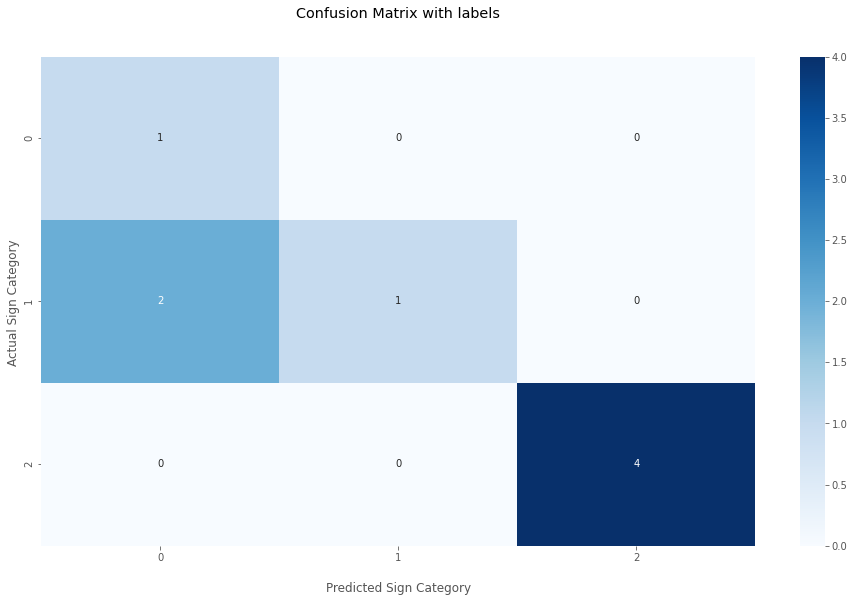

In [133]:
n_neighbors_PC10_15_10inst_verbs = 2
 
knn_PC10_15_10inst_verbs = KNeighborsClassifier(n_neighbors_PC10_15_10inst_verbs)
knn_PC10_15_10inst_verbs.fit(X_train_PC10_15_10inst_verbs, y_train_PC10_15_10inst_verbs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC10_15_10inst_verbs.score(X_train_PC10_15_10inst_verbs, y_train_PC10_15_10inst_verbs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC10_15_10inst_verbs.score(X_test_PC10_15_10inst_verbs, y_test_PC10_15_10inst_verbs)))
	 
import pandas as pd

pred_PC10_15_10inst_verbs = knn_PC10_15_10inst_verbs.predict(X_test_PC10_15_10inst_verbs)
cf_matrix_PC10_15_10inst_verbs = confusion_matrix(y_test_PC10_15_10inst_verbs, pred_PC10_15_10inst_verbs)
print(cf_matrix_PC10_15_10inst_verbs)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC10_15_10inst_verbs = sns.heatmap(cf_matrix_PC10_15_10inst_verbs, annot=True, cmap='Blues')

ax_PC10_15_10inst_verbs.set_title('Confusion Matrix with labels\n\n');
ax_PC10_15_10inst_verbs.set_xlabel('\nPredicted Sign Category');
ax_PC10_15_10inst_verbs.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 3

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 0.88
[[1 0 0]
 [1 2 0]
 [0 0 4]]


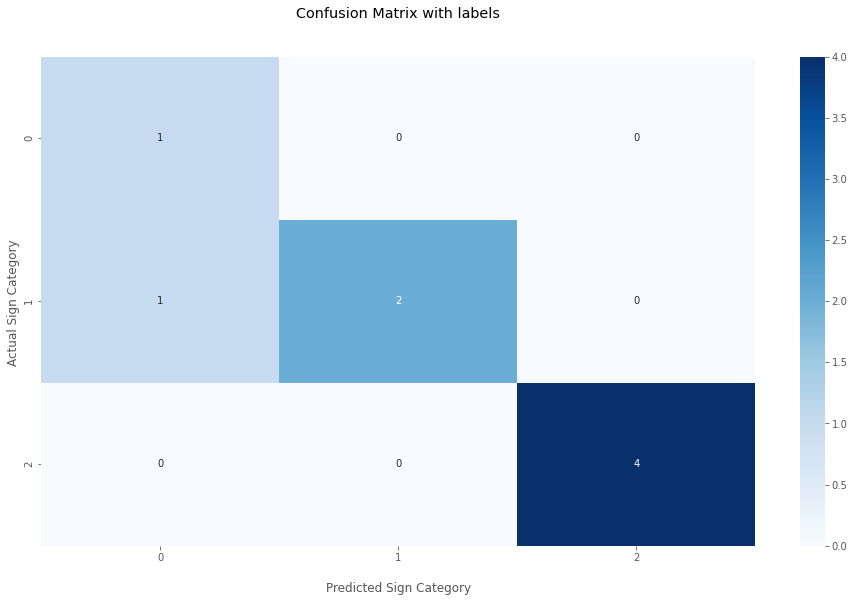

In [134]:
n_neighbors_PC10_15_10inst_verbs = 3
 
knn_PC10_15_10inst_verbs = KNeighborsClassifier(n_neighbors_PC10_15_10inst_verbs)
knn_PC10_15_10inst_verbs.fit(X_train_PC10_15_10inst_verbs, y_train_PC10_15_10inst_verbs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC10_15_10inst_verbs.score(X_train_PC10_15_10inst_verbs, y_train_PC10_15_10inst_verbs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC10_15_10inst_verbs.score(X_test_PC10_15_10inst_verbs, y_test_PC10_15_10inst_verbs)))
	 
import pandas as pd

pred_PC10_15_10inst_verbs = knn_PC10_15_10inst_verbs.predict(X_test_PC10_15_10inst_verbs)
cf_matrix_PC10_15_10inst_verbs = confusion_matrix(y_test_PC10_15_10inst_verbs, pred_PC10_15_10inst_verbs)
print(cf_matrix_PC10_15_10inst_verbs)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC10_15_10inst_verbs = sns.heatmap(cf_matrix_PC10_15_10inst_verbs, annot=True, cmap='Blues')

ax_PC10_15_10inst_verbs.set_title('Confusion Matrix with labels\n\n');
ax_PC10_15_10inst_verbs.set_xlabel('\nPredicted Sign Category');
ax_PC10_15_10inst_verbs.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 5

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 1.00
[[1 0 0]
 [0 3 0]
 [0 0 4]]


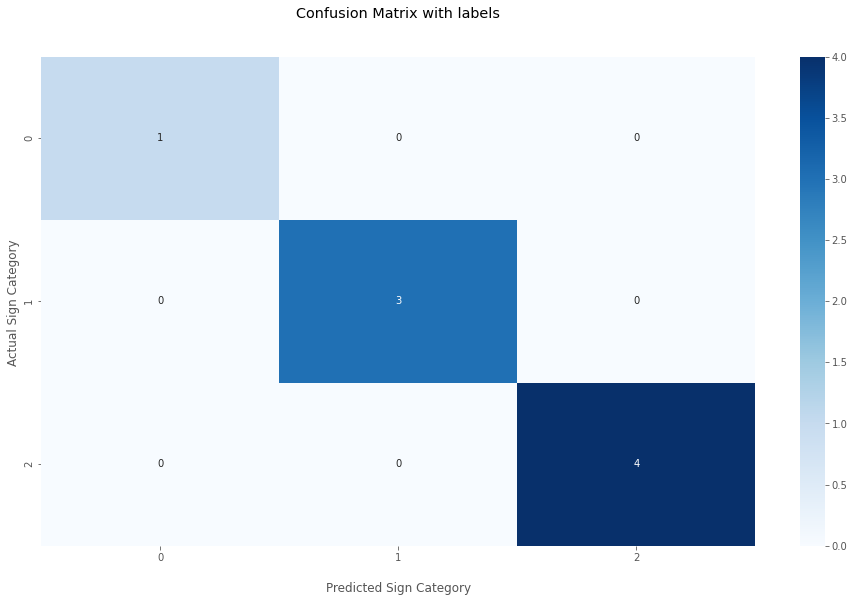

In [135]:
n_neighbors_PC10_15_10inst_verbs = 5
 
knn_PC10_15_10inst_verbs = KNeighborsClassifier(n_neighbors_PC10_15_10inst_verbs)
knn_PC10_15_10inst_verbs.fit(X_train_PC10_15_10inst_verbs, y_train_PC10_15_10inst_verbs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC10_15_10inst_verbs.score(X_train_PC10_15_10inst_verbs, y_train_PC10_15_10inst_verbs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC10_15_10inst_verbs.score(X_test_PC10_15_10inst_verbs, y_test_PC10_15_10inst_verbs)))
	 
import pandas as pd

pred_PC10_15_10inst_verbs = knn_PC10_15_10inst_verbs.predict(X_test_PC10_15_10inst_verbs)
cf_matrix_PC10_15_10inst_verbs = confusion_matrix(y_test_PC10_15_10inst_verbs, pred_PC10_15_10inst_verbs)
print(cf_matrix_PC10_15_10inst_verbs)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC10_15_10inst_verbs = sns.heatmap(cf_matrix_PC10_15_10inst_verbs, annot=True, cmap='Blues')

ax_PC10_15_10inst_verbs.set_title('Confusion Matrix with labels\n\n');
ax_PC10_15_10inst_verbs.set_xlabel('\nPredicted Sign Category');
ax_PC10_15_10inst_verbs.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

In [136]:
##############################
  #HOW TO CALCULATE WITH PCA ( 6 components )
#############################


		
projection_verbs = pca_verbs.transform(X=new_verbs_dataset_15_10inst)
projection_verbs = pd.DataFrame(
    projection_verbs,
    columns =[ 'PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC6','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30'],
    index   = new_verbs_dataset_15_10inst.index
)
projection_verbs.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC6,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,-1.230948,-6.863344,-7.120026,-6.015051,-1.347710,-2.313597,-0.460766,0.483156,-1.418449,-1.275804,...,-0.181705,-0.301425,-0.023856,0.083025,0.438540,-0.589323,0.374955,-0.139983,0.290266,-0.098989
1,-3.473899,-7.012193,-6.595022,-6.275055,-2.180829,-1.720133,-1.475722,0.803843,-0.978464,-1.696043,...,-0.155438,0.139756,-0.100986,-0.181138,0.909447,-0.667253,0.064189,-0.109193,0.255323,0.001900
2,-0.624820,-6.821121,-6.737548,-5.763252,-1.292660,-2.276969,-0.463819,0.167448,-1.512926,-1.081916,...,-0.275831,-0.074698,-0.207829,-0.018496,0.354888,-0.558076,0.394178,-0.092603,0.169670,-0.085871
3,-1.560692,-7.535235,-5.994129,-4.734533,-1.031778,-2.387975,-0.708134,0.482082,-1.540635,-1.441769,...,-0.116259,-0.012053,0.076935,-0.269072,0.546235,-0.507512,0.152771,-0.208492,0.167408,-0.040719
4,-3.576838,-7.199196,-6.581287,-5.791579,-1.867002,-1.806051,-1.522375,0.850877,-0.981328,-1.583279,...,-0.155852,-0.015176,0.001430,-0.208702,0.961025,-0.614991,0.092468,-0.104751,0.300837,0.009910


In [137]:
PC6_15_10inst_verbs = projection_verbs.iloc[:,0:6]
PC6_15_10inst_verbs.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.230948,-6.863344,-7.120026,-6.015051,-1.347710,-2.313597
1,-3.473899,-7.012193,-6.595022,-6.275055,-2.180829,-1.720133
2,-0.624820,-6.821121,-6.737548,-5.763252,-1.292660,-2.276969
3,-1.560692,-7.535235,-5.994129,-4.734533,-1.031778,-2.387975
4,-3.576838,-7.199196,-6.581287,-5.791579,-1.867002,-1.806051


In [138]:

PC6_15_10inst_verbs.insert(0,"instance",['aprender_175', 'aprender_18', 'aprender_195', 'aprender_217',
       'aprender_27', 'aprender_282', 'aprender_34', 'aprender_35',
       'aprender_7', 'aprender__466', 'comer_144', 'comer_248',
       'comer_286', 'comer_303', 'comer_323', 'comer_335', 'comer_560',
       'comer_625', 'comer_712', 'comer_765', 'sentir_14', 'sentir_149',
       'sentir_16', 'sentir_187', 'sentir_38', 'sentir_458', 'sentir_591',
       'sentir_602', 'sentir_604', 'sentir_89'],True)

In [139]:
PC6_15_10inst_verbs['classes'] = PC6_15_10inst_verbs['instance'].apply(lambda x: x.split('_')[0])

C:\Users\BRENDA\anaconda3\envs\pose\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [140]:
PC6_15_10inst_verbs.drop("instance", axis=1, inplace=True)

PC6_15_10inst_verbs.head()

C:\Users\BRENDA\anaconda3\envs\pose\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,PC1,PC2,PC3,PC4,PC5,PC6,classes
0,-1.230948,-6.863344,-7.120026,-6.015051,-1.347710,-2.313597,aprender
1,-3.473899,-7.012193,-6.595022,-6.275055,-2.180829,-1.720133,aprender
2,-0.624820,-6.821121,-6.737548,-5.763252,-1.292660,-2.276969,aprender
3,-1.560692,-7.535235,-5.994129,-4.734533,-1.031778,-2.387975,aprender
4,-3.576838,-7.199196,-6.581287,-5.791579,-1.867002,-1.806051,aprender


In [141]:
print(pd.unique(PC6_15_10inst_verbs['classes']))

X_PC6_15_10inst_verbs= PC6_15_10inst_verbs.iloc[:,:-1].values
y_PC6_15_10inst_verbs=  PC6_15_10inst_verbs.iloc[:,-1].values

['aprender' 'comer' 'sentir']


In [142]:
Labelencoder_Y = LabelEncoder()
y_PC6_15_10inst_verbs== Labelencoder_Y.fit_transform(y_PC6_15_10inst_verbs)
y_PC6_15_10inst_verbs

array(['aprender', 'aprender', 'aprender', 'aprender', 'aprender',
       'aprender', 'aprender', 'aprender', 'aprender', 'aprender',
       'comer', 'comer', 'comer', 'comer', 'comer', 'comer', 'comer',
       'comer', 'comer', 'comer', 'sentir', 'sentir', 'sentir', 'sentir',
       'sentir', 'sentir', 'sentir', 'sentir', 'sentir', 'sentir'],
      dtype=object)

In [143]:
X_train_PC6_15_10inst_verbs, X_test_PC6_15_10inst_verbs, y_train_PC6_15_10inst_verbs, y_test_PC6_15_10inst_verbs = train_test_split(X_PC6_15_10inst_verbs, y_PC6_15_10inst_verbs, test_size = 0.25, random_state=0)
scaler = MinMaxScaler()
X_train_PC6_15_10inst_verbs = scaler.fit_transform(X_train_PC6_15_10inst_verbs)
X_test_PC6_15_10inst_verbs = scaler.transform(X_test_PC6_15_10inst_verbs)

([<matplotlib.axis.XTick at 0x1c44e87e408>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

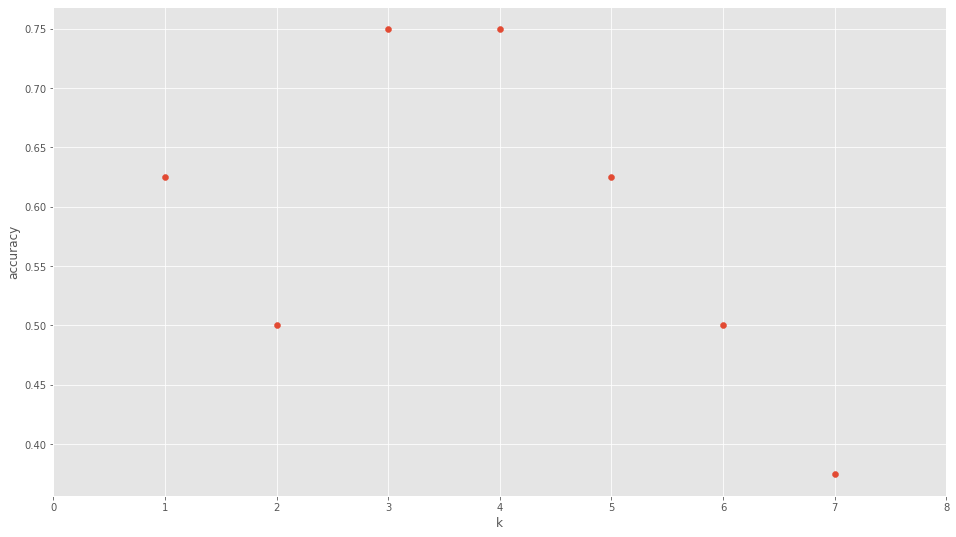

In [144]:
k_range_PC6_15_10inst_verbs = range(1, 8)
scores_PC6_15_10inst_verbs = []
for k in k_range_PC6_15_10inst_verbs:
    knn_PC6_15_10inst_verbs = KNeighborsClassifier(n_neighbors = k)
    knn_PC6_15_10inst_verbs.fit(X_train_PC6_15_10inst_verbs, y_train_PC6_15_10inst_verbs)
    scores_PC6_15_10inst_verbs.append(knn_PC6_15_10inst_verbs.score(X_test_PC6_15_10inst_verbs, y_test_PC6_15_10inst_verbs))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range_PC6_15_10inst_verbs, scores_PC6_15_10inst_verbs)
plt.xticks([0,1,2,3,4,5,6,7,8])

# With k = 1

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.62
[[1 0 0]
 [1 1 1]
 [1 0 3]]


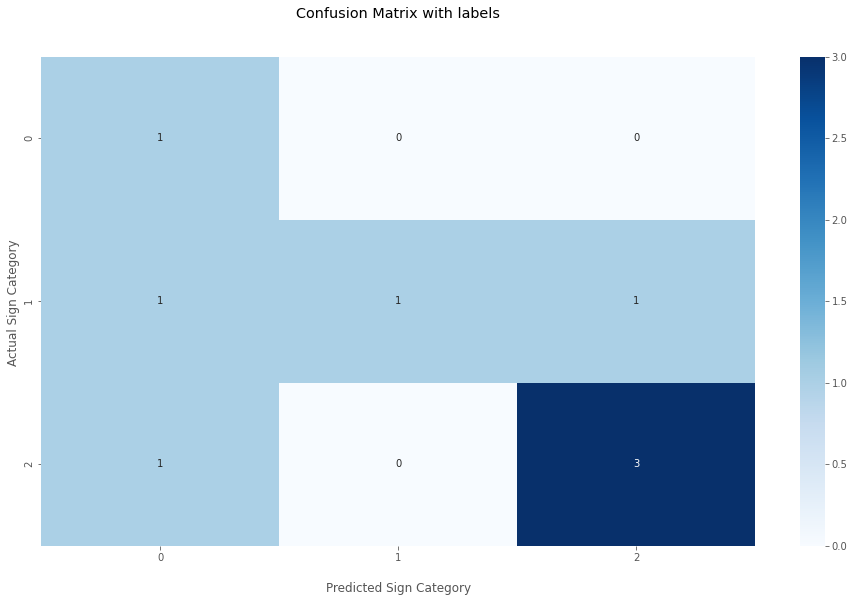

In [145]:
n_neighbors_PC6_15_10inst_verbs = 1
 
knn_PC6_15_10inst_verbs = KNeighborsClassifier(n_neighbors_PC6_15_10inst_verbs)
knn_PC6_15_10inst_verbs.fit(X_train_PC6_15_10inst_verbs, y_train_PC6_15_10inst_verbs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC6_15_10inst_verbs.score(X_train_PC6_15_10inst_verbs, y_train_PC6_15_10inst_verbs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC6_15_10inst_verbs.score(X_test_PC6_15_10inst_verbs, y_test_PC6_15_10inst_verbs)))
	 
import pandas as pd
pred_PC6_15_10inst_verbs = knn_PC6_15_10inst_verbs.predict(X_test_PC6_15_10inst_verbs)
cf_matrix_PC6_15_10inst_verbs = confusion_matrix(y_test_PC6_15_10inst_verbs, pred_PC6_15_10inst_verbs)
print(cf_matrix_PC6_15_10inst_verbs)


import seaborn as sns
import matplotlib.pyplot as plt

ax_PC6_15_10inst_verbs = sns.heatmap(cf_matrix_PC6_15_10inst_verbs, annot=True, cmap='Blues')

ax_PC6_15_10inst_verbs.set_title('Confusion Matrix with labels\n\n');
ax_PC6_15_10inst_verbs.set_xlabel('\nPredicted Sign Category');
ax_PC6_15_10inst_verbs.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 2

Accuracy of K-NN classifier on training set: 0.91
Accuracy of K-NN classifier on test set: 0.50
[[1 0 0]
 [2 1 0]
 [2 0 2]]


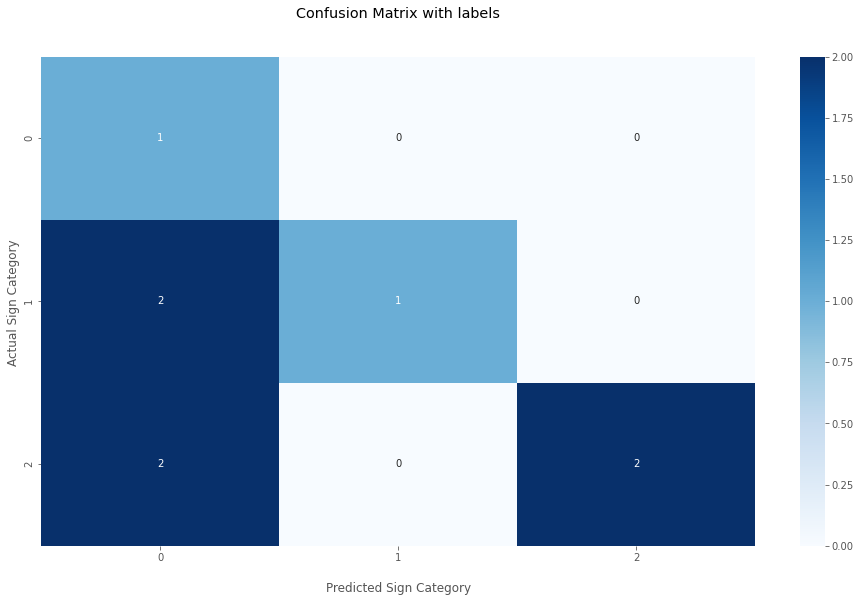

In [146]:
n_neighbors_PC6_15_10inst_verbs = 2
 
knn_PC6_15_10inst_verbs = KNeighborsClassifier(n_neighbors_PC6_15_10inst_verbs)
knn_PC6_15_10inst_verbs.fit(X_train_PC6_15_10inst_verbs, y_train_PC6_15_10inst_verbs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC6_15_10inst_verbs.score(X_train_PC6_15_10inst_verbs, y_train_PC6_15_10inst_verbs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC6_15_10inst_verbs.score(X_test_PC6_15_10inst_verbs, y_test_PC6_15_10inst_verbs)))
	 
import pandas as pd
pred_PC6_15_10inst_verbs = knn_PC6_15_10inst_verbs.predict(X_test_PC6_15_10inst_verbs)
cf_matrix_PC6_15_10inst_verbs = confusion_matrix(y_test_PC6_15_10inst_verbs, pred_PC6_15_10inst_verbs)
print(cf_matrix_PC6_15_10inst_verbs)


import seaborn as sns
import matplotlib.pyplot as plt

ax_PC6_15_10inst_verbs = sns.heatmap(cf_matrix_PC6_15_10inst_verbs, annot=True, cmap='Blues')

ax_PC6_15_10inst_verbs.set_title('Confusion Matrix with labels\n\n');
ax_PC6_15_10inst_verbs.set_xlabel('\nPredicted Sign Category');
ax_PC6_15_10inst_verbs.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 3

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 0.75
[[1 0 0]
 [2 1 0]
 [0 0 4]]


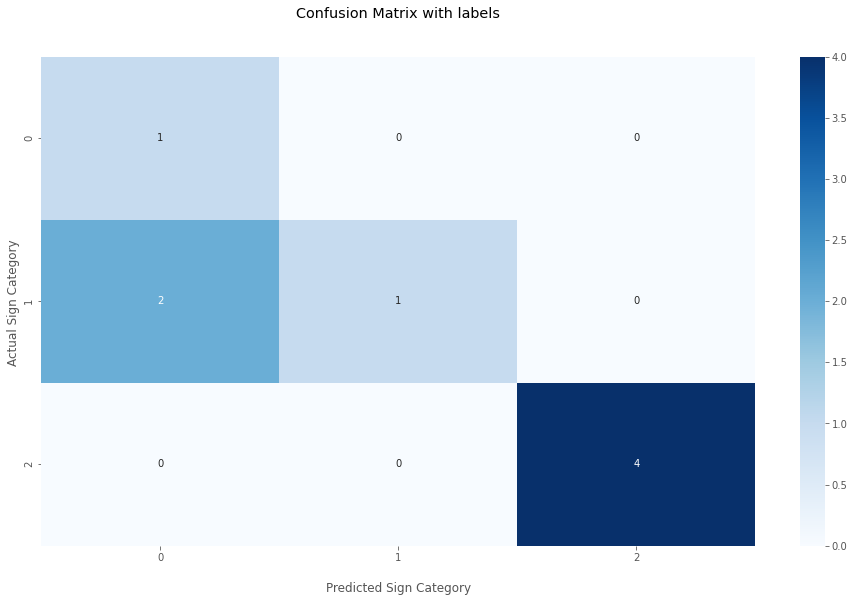

In [147]:
n_neighbors_PC6_15_10inst_verbs = 3
 
knn_PC6_15_10inst_verbs = KNeighborsClassifier(n_neighbors_PC6_15_10inst_verbs)
knn_PC6_15_10inst_verbs.fit(X_train_PC6_15_10inst_verbs, y_train_PC6_15_10inst_verbs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC6_15_10inst_verbs.score(X_train_PC6_15_10inst_verbs, y_train_PC6_15_10inst_verbs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC6_15_10inst_verbs.score(X_test_PC6_15_10inst_verbs, y_test_PC6_15_10inst_verbs)))
	 
import pandas as pd
pred_PC6_15_10inst_verbs = knn_PC6_15_10inst_verbs.predict(X_test_PC6_15_10inst_verbs)
cf_matrix_PC6_15_10inst_verbs = confusion_matrix(y_test_PC6_15_10inst_verbs, pred_PC6_15_10inst_verbs)
print(cf_matrix_PC6_15_10inst_verbs)


import seaborn as sns
import matplotlib.pyplot as plt

ax_PC6_15_10inst_verbs = sns.heatmap(cf_matrix_PC6_15_10inst_verbs, annot=True, cmap='Blues')

ax_PC6_15_10inst_verbs.set_title('Confusion Matrix with labels\n\n');
ax_PC6_15_10inst_verbs.set_xlabel('\nPredicted Sign Category');
ax_PC6_15_10inst_verbs.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 5

Accuracy of K-NN classifier on training set: 0.91
Accuracy of K-NN classifier on test set: 0.62
[[1 0 0]
 [2 1 0]
 [0 1 3]]


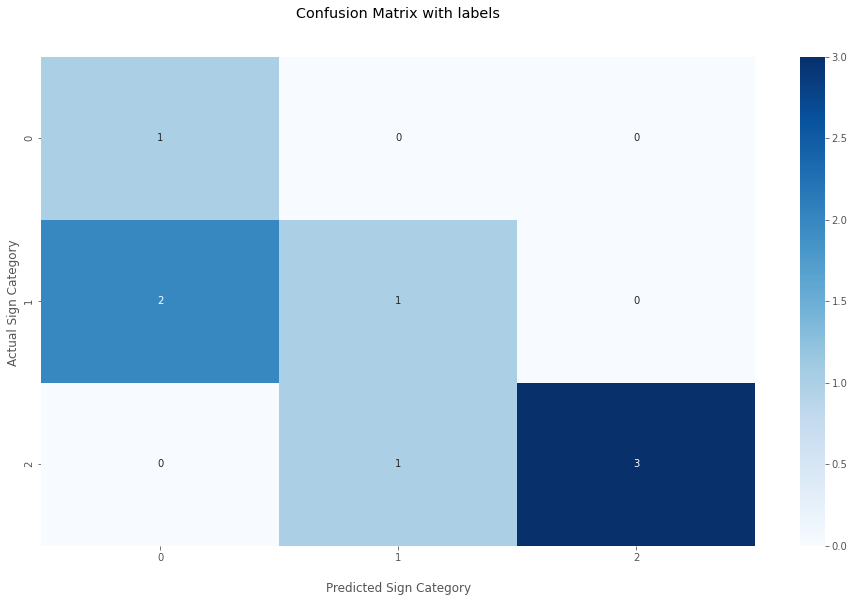

In [148]:
n_neighbors_PC6_15_10inst_verbs = 5
 
knn_PC6_15_10inst_verbs = KNeighborsClassifier(n_neighbors_PC6_15_10inst_verbs)
knn_PC6_15_10inst_verbs.fit(X_train_PC6_15_10inst_verbs, y_train_PC6_15_10inst_verbs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC6_15_10inst_verbs.score(X_train_PC6_15_10inst_verbs, y_train_PC6_15_10inst_verbs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC6_15_10inst_verbs.score(X_test_PC6_15_10inst_verbs, y_test_PC6_15_10inst_verbs)))
	 
import pandas as pd
pred_PC6_15_10inst_verbs = knn_PC6_15_10inst_verbs.predict(X_test_PC6_15_10inst_verbs)
cf_matrix_PC6_15_10inst_verbs = confusion_matrix(y_test_PC6_15_10inst_verbs, pred_PC6_15_10inst_verbs)
print(cf_matrix_PC6_15_10inst_verbs)


import seaborn as sns
import matplotlib.pyplot as plt

ax_PC6_15_10inst_verbs = sns.heatmap(cf_matrix_PC6_15_10inst_verbs, annot=True, cmap='Blues')

ax_PC6_15_10inst_verbs.set_title('Confusion Matrix with labels\n\n');
ax_PC6_15_10inst_verbs.set_xlabel('\nPredicted Sign Category');
ax_PC6_15_10inst_verbs.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

In [149]:
PCA_6components_verbs = PC1_df_verbs.append(PC2_df_verbs).append(PC3_df_verbs).append(PC4_df_verbs).append(PC5_df_verbs).append(PC6_df_verbs)

In [150]:
dic = {}
for i in range(60):
    x = list(PCA_6components_verbs.iloc[i,:])
    if x[0] not in dic:
        dic[x[0]] = 1
    else:
        dic[x[0]] +=1
		
dic

{'feature_514': 1,
 'feature_491': 1,
 'feature_537': 1,
 'feature_493': 1,
 'feature_445': 1,
 'feature_468': 1,
 'feature_560': 1,
 'feature_609': 1,
 'feature_516': 1,
 'feature_632': 1,
 'feature_118': 1,
 'feature_141': 1,
 'feature_95': 1,
 'feature_164': 1,
 'feature_72': 1,
 'feature_117': 1,
 'feature_94': 1,
 'feature_30': 1,
 'feature_140': 1,
 'feature_71': 1,
 'feature_229': 1,
 'feature_227': 1,
 'feature_225': 1,
 'feature_202': 1,
 'feature_206': 1,
 'feature_204': 1,
 'feature_252': 1,
 'feature_250': 1,
 'feature_179': 1,
 'feature_248': 1,
 'feature_566': 1,
 'feature_589': 1,
 'feature_543': 1,
 'feature_612': 1,
 'feature_520': 1,
 'feature_635': 1,
 'feature_568': 1,
 'feature_591': 1,
 'feature_497': 1,
 'feature_637': 1,
 'feature_113': 1,
 'feature_111': 1,
 'feature_134': 1,
 'feature_136': 1,
 'feature_107': 1,
 'feature_132': 1,
 'feature_90': 1,
 'feature_84': 1,
 'feature_109': 1,
 'feature_130': 1,
 'feature_313': 1,
 'feature_336': 1,
 'feature_290': 1,
